In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)

# **Reading The Data**

In [3]:
df = pd.read_csv(r'/kaggle/input/customer-personality-analysis/marketing_campaign.csv',sep=('\t'))
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# **EDA**

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2240 entries, 0 to 2239

Data columns (total 29 columns):

 #   Column               Non-Null Count  Dtype  

---  ------               --------------  -----  

 0   ID                   2240 non-null   int64  

 1   Year_Birth           2240 non-null   int64  

 2   Education            2240 non-null   object 

 3   Marital_Status       2240 non-null   object 

 4   Income               2216 non-null   float64

 5   Kidhome              2240 non-null   int64  

 6   Teenhome             2240 non-null   int64  

 7   Dt_Customer          2240 non-null   object 

 8   Recency              2240 non-null   int64  

 9   MntWines             2240 non-null   int64  

 10  MntFruits            2240 non-null   int64  

 11  MntMeatProducts      2240 non-null   int64  

 12  MntFishProducts      2240 non-null   int64  

 13  MntSweetProducts     2240 non-null   int64  

 14  MntGoldProds         2240 non-null   int64  

 15  NumDealsPurchases 

In [125]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Converting Categorical columns**

In [126]:
df['Education']=df['Education'].astype('category')
df['Marital_Status']=df['Marital_Status'].astype('category')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['year'] = df['Dt_Customer'].dt.year
df['month'] = df['Dt_Customer'].dt.month
df['day'] = df['Dt_Customer'].dt.day
df['day_of_week'] = df['Dt_Customer'].dt.dayofweek 


**Editing Columns**

In [127]:
df.rename(columns={'Year_Birth':'Age'},inplace=True)
df['Age'] = 2024 - df['Age']


In [128]:
df.describe()

,ID,Age,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year,month,day,day_of_week
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,55.194196,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,2013.028125,6.467411,15.638393,2.989732
min,0.000000,28.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,1.000000,1.000000,0.000000
25%,2828.250000,47.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,3.000000,8.000000,1.000000
50%,5458.500000,54.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,6.000000,16.000000,3.000000
75%,8427.750000,65.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,10.000000,23.000000,5.000000
max,11191.000000,131.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,12.000000,31.000000,6.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.684554,3.486695,8.790680,1.999192


**Dropping Unnecessary Columns**

In [129]:
df.drop(columns=['ID','Dt_Customer'],inplace=True)


# **Visualization**

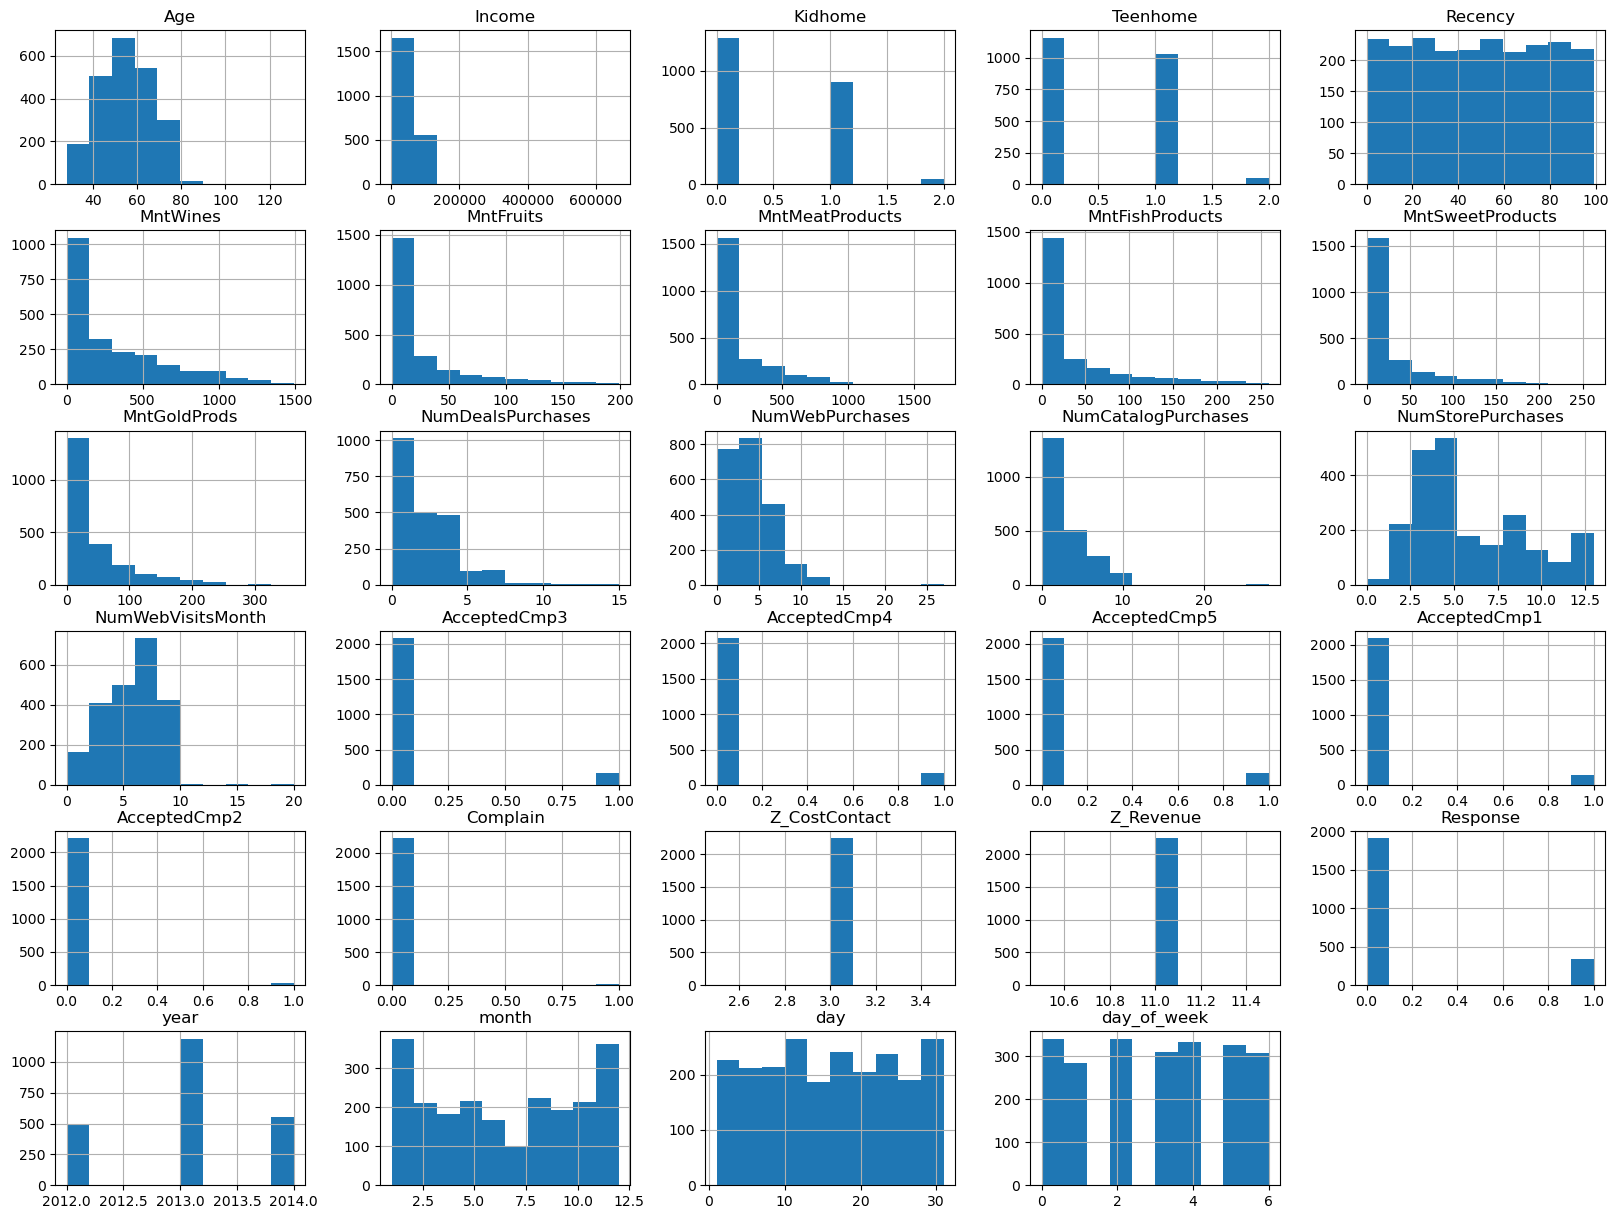

In [130]:
df.hist(figsize=(20,15))
plt.show()

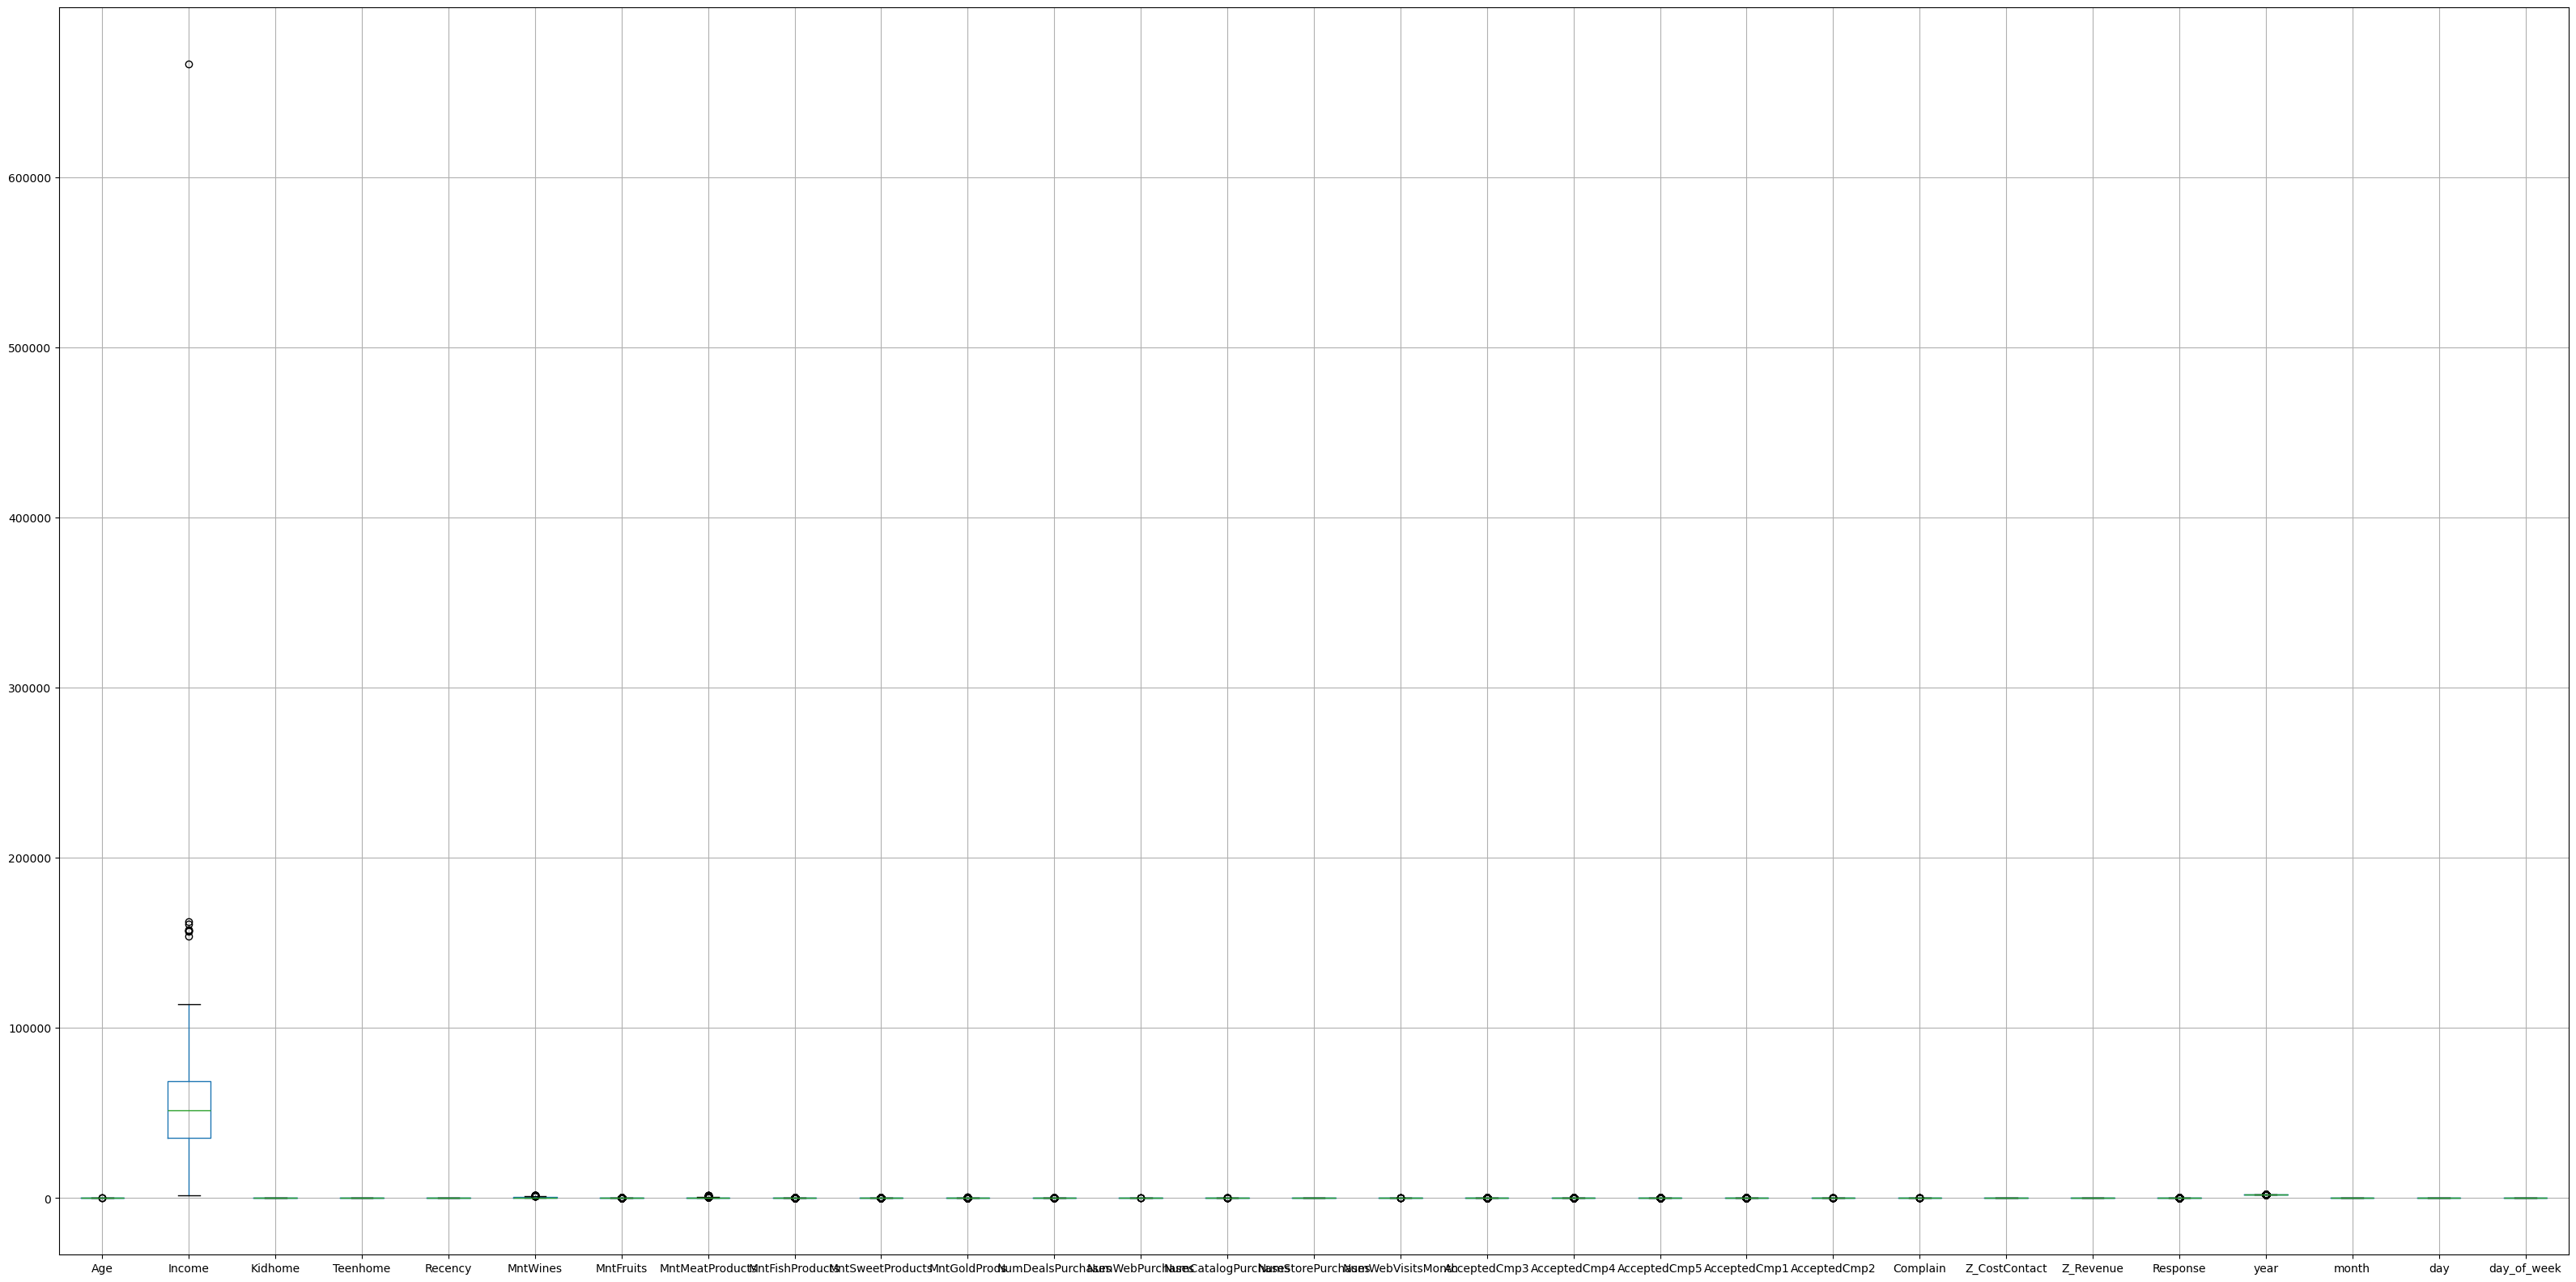

In [131]:
df.boxplot(figsize=(40,20))

plt.show()

**Correlation**

In [132]:
corr = df.corr(numeric_only=True)


<Axes: >

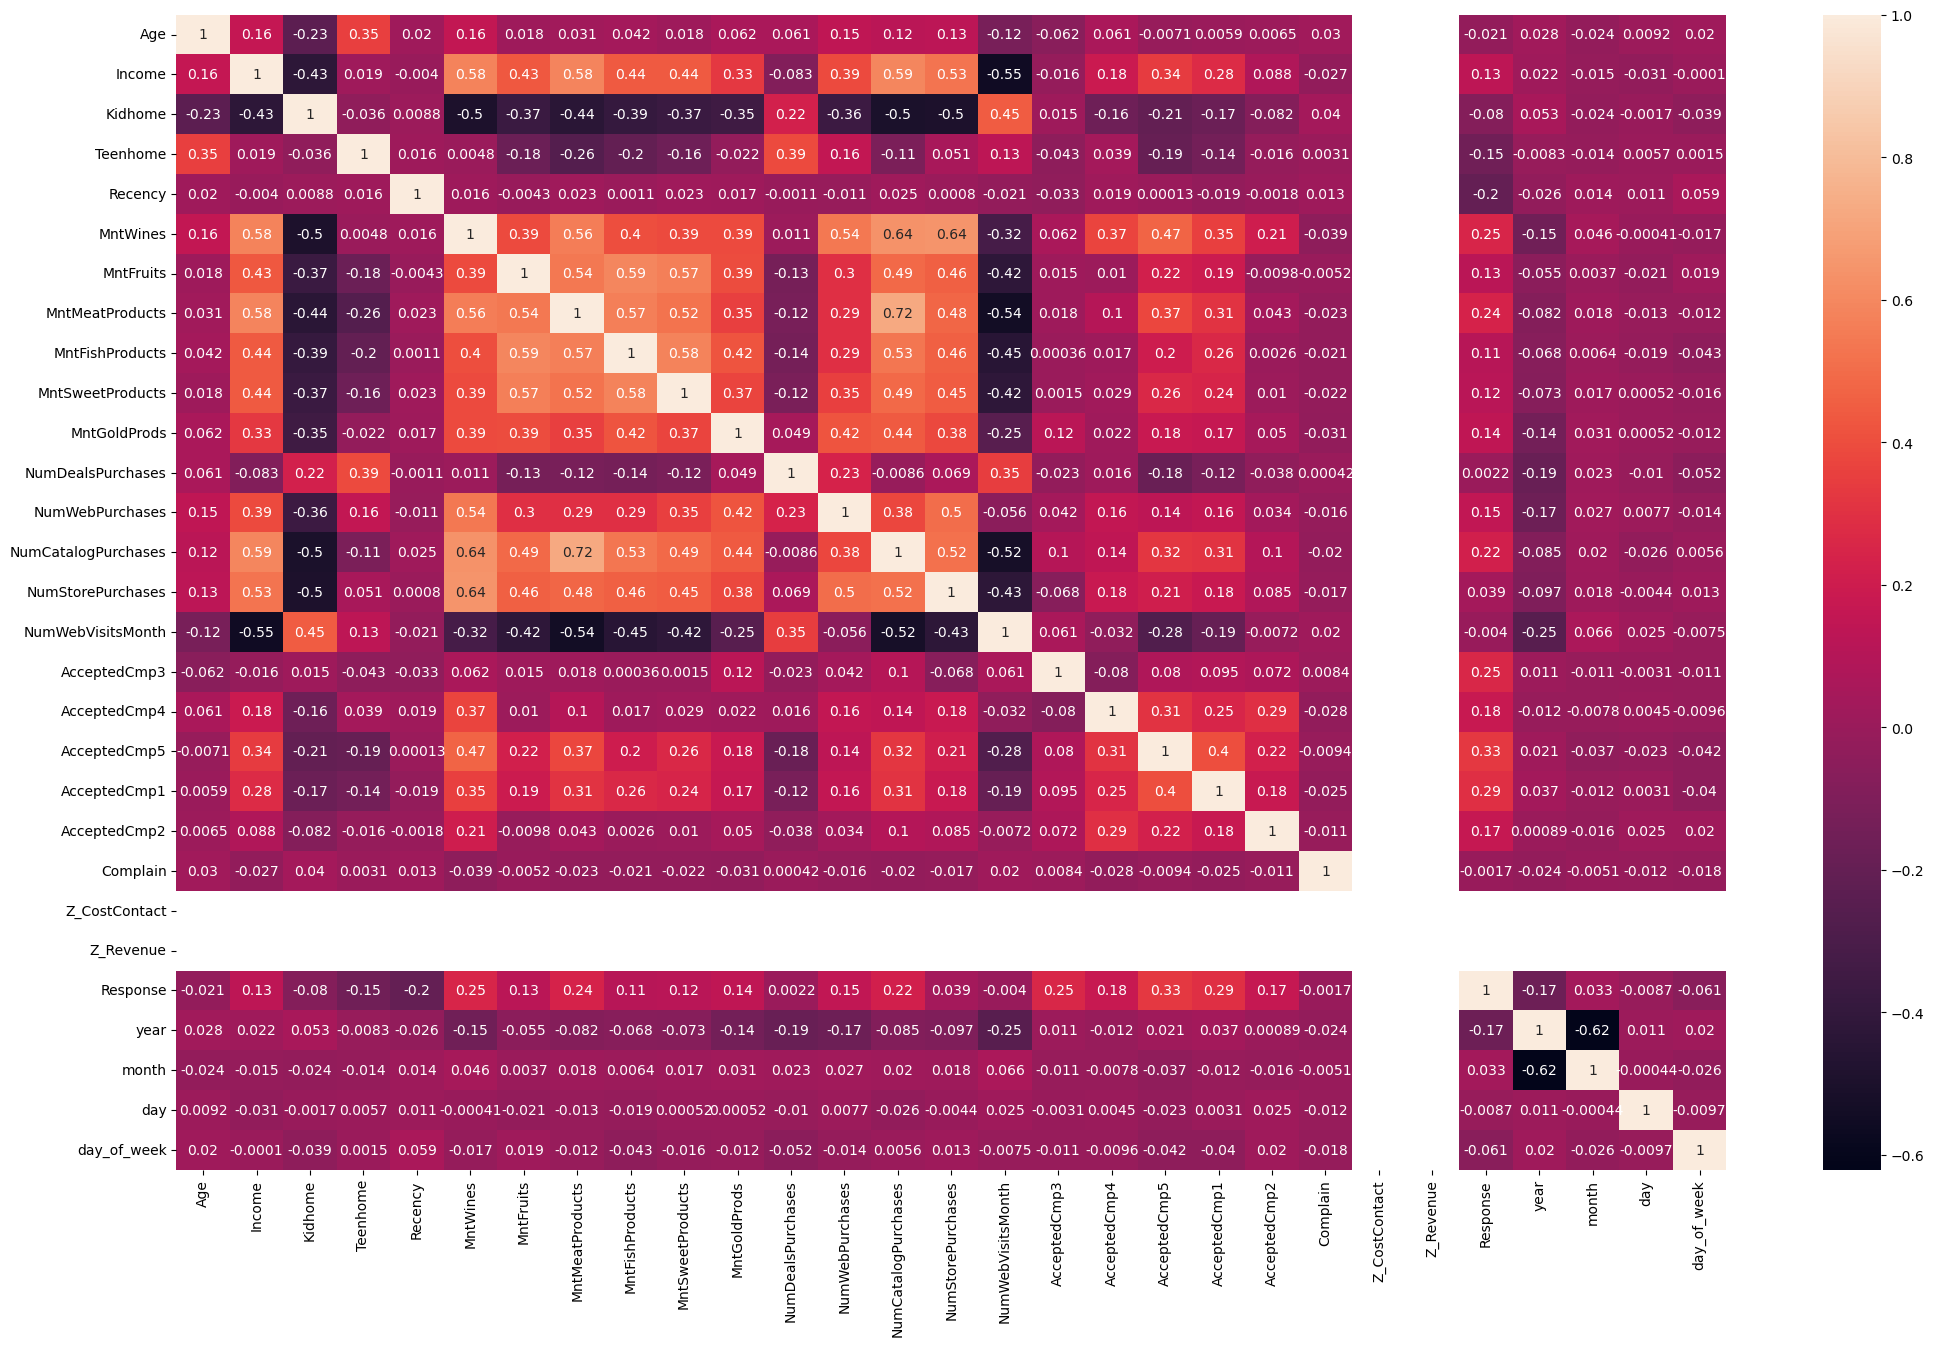

In [133]:
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True)

**Removing Outliers**

In [135]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]



# **Preprocessing**

In [142]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ('num_attribs', num_pipeline, ['Age','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response','year','month','day','day_of_week']),
    ('cat', cat_pipeline, ['Education', 'Marital_Status'])
])
df = full_pipeline.fit_transform(df)

# **Modeling**

In [149]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=42)
Y = kmeans.fit_predict(df)





# **Visualizing Results**

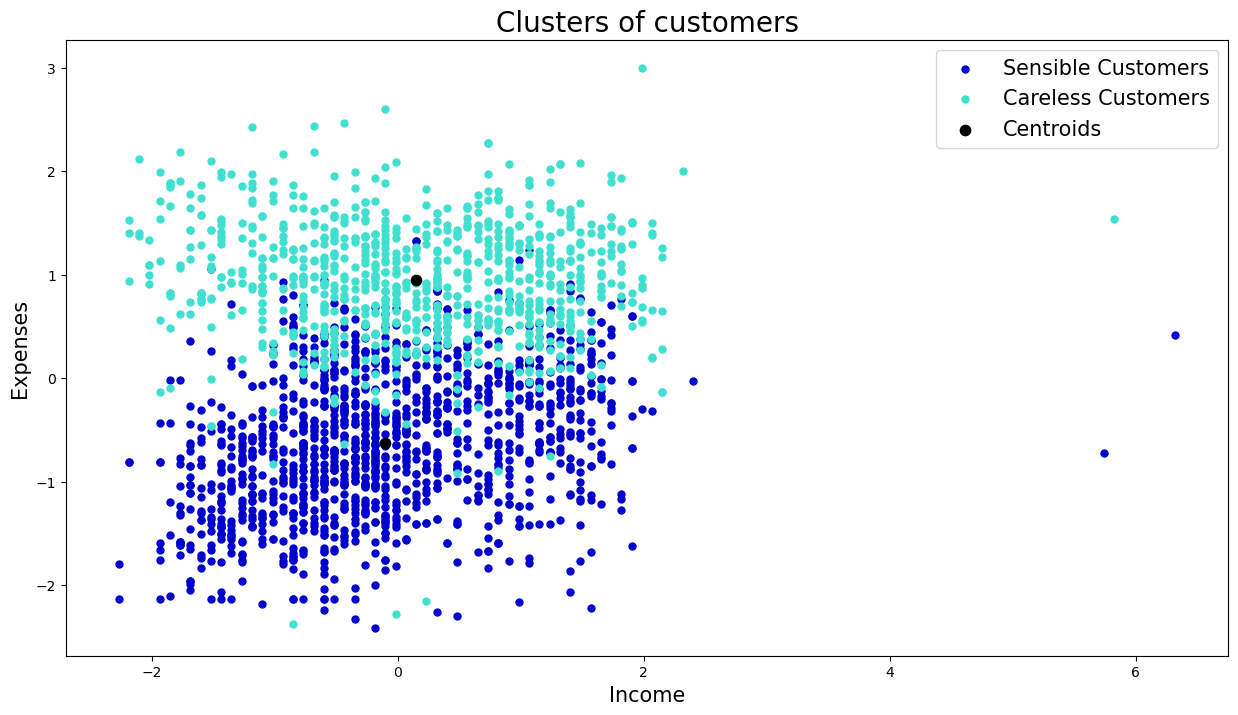

In [150]:
plt.figure(figsize= (15,8))
plt.scatter(df[Y == 0, 0], df[Y == 0, 1], s = 25, c = 'mediumblue', label = 'Sensible Customers')
plt.scatter(df[Y == 1, 0], df[Y == 1, 1], s = 25, c = 'turquoise', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()